Purpose: In this assignment, you will apply clustering algorithms to exons and introns.

Programming:

• Use the same datasets (training, validation, and testing) from HW2.

• Write one Jupyter notebook for the entire assignment. Organize your notebook with
appropriate markdown titles and comments to make it easy to follow.


In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.cluster import DBSCAN

In [32]:
X_train = np.load("/content/drive/MyDrive/mlinmb/2/feature_matrix_train.npy")
y_train = np.load("/content/drive/MyDrive/mlinmb/2/label_array_train.npy")

X_valid = np.load("/content/drive/MyDrive/mlinmb/2/feature_matrix_valid.npy")
y_valid = np.load("/content/drive/MyDrive/mlinmb/2/label_array_valid.npy")

X_test = np.load("/content/drive/MyDrive/mlinmb/2/feature_matrix_test.npy")
y_test = np.load("/content/drive/MyDrive/mlinmb/2/label_array_test.npy")

In [33]:
# get all indices for the corresponding label
intron_indices = np.where(y_train == 0)[0]
exon_indices = np.where(y_train == 1)[0]

np.random.shuffle(intron_indices)
np.random.shuffle(exon_indices)

# select the first 2000
intron_subset_indices = intron_indices[:1000]
exon_subset_indices = exon_indices[:1000]

X_introns = X_train[intron_subset_indices]
X_exons = X_train[exon_subset_indices]

# combine subsets into a single array
X_subset = np.concatenate([X_introns, X_exons], axis=0)
# create label vector
y_subset = np.concatenate([np.zeros(len(X_introns)), np.ones(len(X_exons))], axis=0)


• Apply the k-means algorithm:

o Determine the appropriate value of k using:

§ The elbow approach.

§ The average silhoueHe score
.

§ SilhoueHe diagrams for all k values (you should use a small number of
samples, e.g., 1000 exons and 1000 introns chosen randomly while generating
these plots).

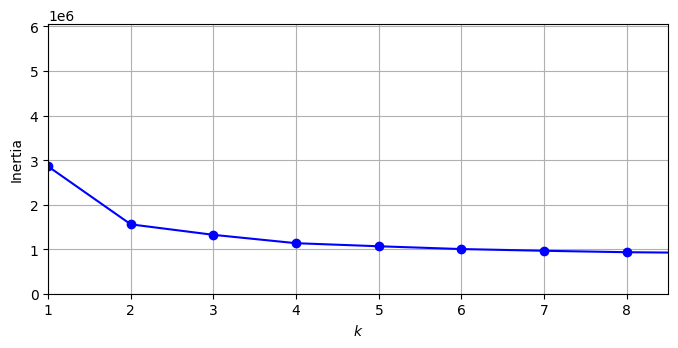

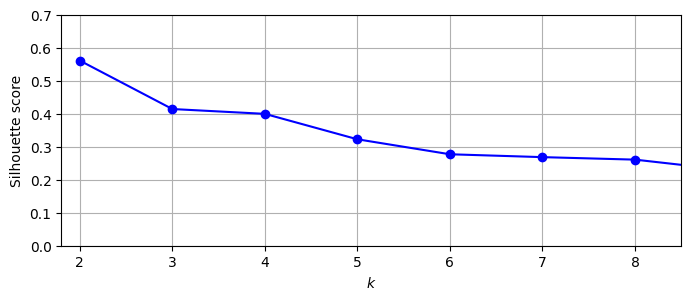

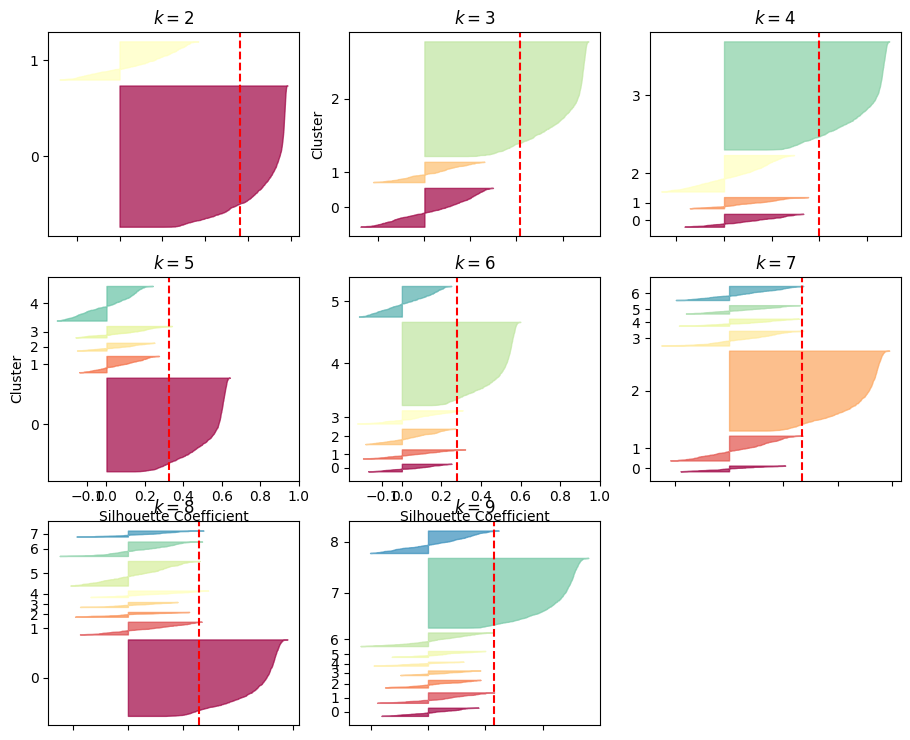

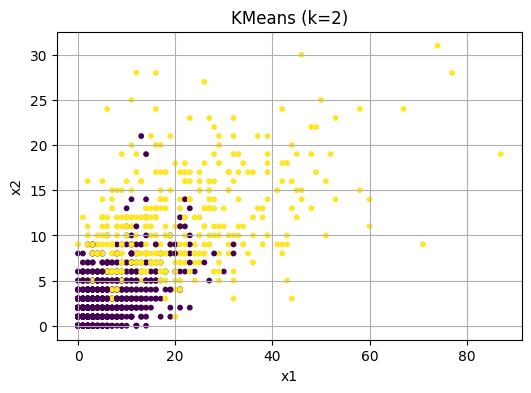

In [34]:
# elbow method and silhouette

# copied from notebook
kmeans_per_k = [KMeans(n_clusters=k,  init='random', n_init=10, random_state=42).fit(X_subset)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

# diagram inertia vs. k

# copied from notebook
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.axis([1, 8.5, 0, 6050135])
plt.grid()
plt.show()


# diagram silhouette score vs. k

# copied from notebook
silhouette_scores = [silhouette_score(X_subset, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0, 0.7])
plt.grid()
plt.show()


# silhouette diagram

# copied from notebook
plt.figure(figsize=(11, 9))

for k in range(2, 10):
    plt.subplot(3, 3, k - 1)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X_subset, y_pred)

    padding = len(X_subset) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()

# picking final k and clustering

# copied from notebook
k = 2
kmeans = KMeans(n_clusters=k, init='random', n_init= 10, random_state=42)
y_pred = kmeans.fit_predict(X_subset)

plt.figure(figsize=(6, 4))
plt.scatter(X_subset[:, 0], X_subset[:, 1], c=y_pred, s=10, cmap="viridis")
plt.title(f"KMeans (k={k})")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()


• Apply the k-means++ algorithm:

o Determine the appropriate value of k using:

§ The elbow approach.

§ The average silhoueHe score.

§ SilhoueHe diagrams for all k values (you should use a small number of
samples, e.g., 1000 exons and 1000 introns chosen randomly while generating
these plots).

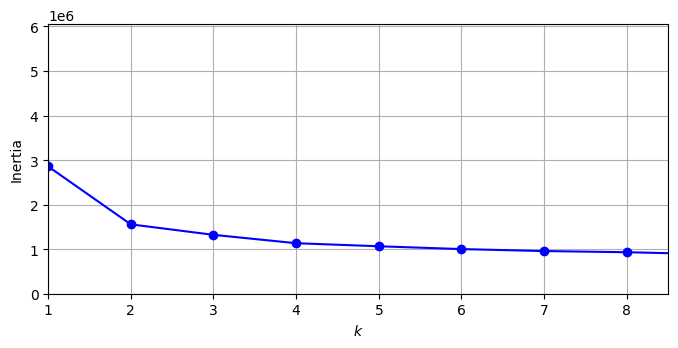

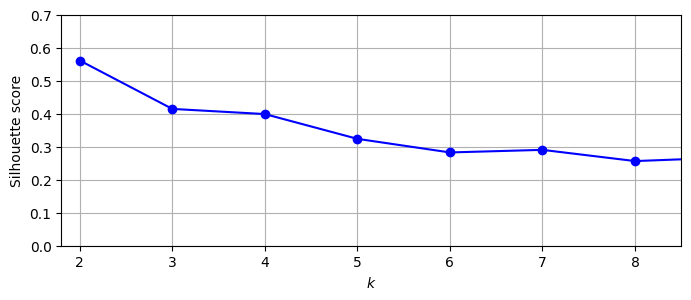

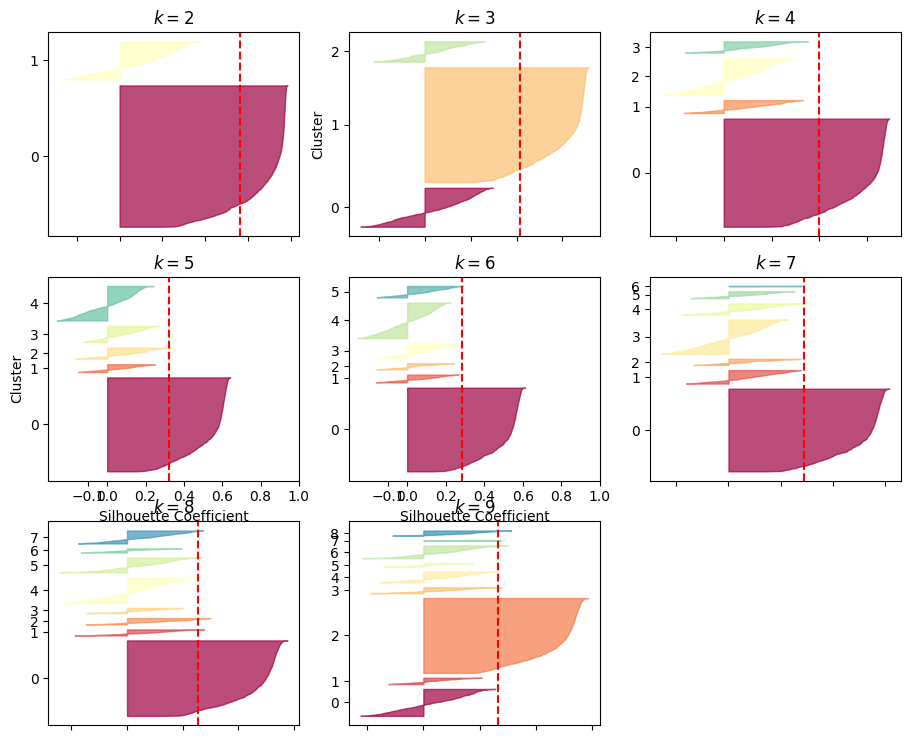

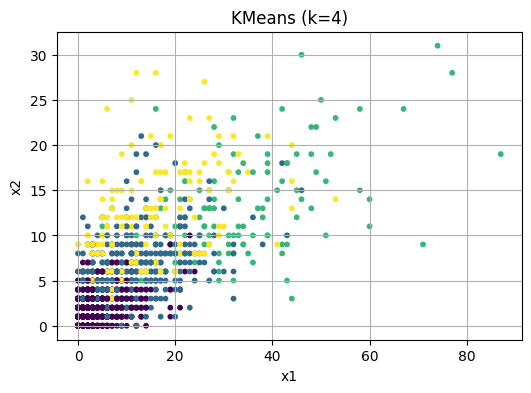

In [35]:
# elbow method and silhouette

# copied from notebook
kmeans_per_k = [KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42).fit(X_subset)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

# diagram inertia vs. k

# copied from notebook
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.axis([1, 8.5, 0, 6050135])
plt.grid()
plt.show()


# diagram silhouette score vs. k

# copied from notebook
silhouette_scores = [silhouette_score(X_subset, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0, 0.7])
plt.grid()
plt.show()


# silhouette diagram

# copied from notebook
plt.figure(figsize=(11, 9))

for k in range(2, 10):
    plt.subplot(3, 3, k - 1)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X_subset, y_pred)

    padding = len(X_subset) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()

# picking final k and clustering

# copied from notebook
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=42)
y_pred = kmeans.fit_predict(X_subset)

plt.figure(figsize=(6, 4))
plt.scatter(X_subset[:, 0], X_subset[:, 1], c=y_pred, s=10, cmap="viridis")
plt.title(f"KMeans (k={k})")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()


• Summarize your observations: Include a markdown section with bullet points summarizing:
o What you did.
o What you observed, e.g., are exons and introns form separate clusters?
o What you concluded.


First I added shuffling to the data extraction step. Then I used basically the exact same code as in notebook's examples to do K-means clustering on the X_subset for numbers of clusters from 1 to 9.
Then I pllotted inertia vs the number of clusters to find the elbow point, to set the optimal number of clusters. The elbow was most visible in k = 2 and 4/5.
Then I plotted silhouette scores to evaluate separation of clusters and silhouette coefficient plots that visualizes distribution of silhouette scores for each cluster. They did not look good, I think they are very condesnsed and not separated well. Based on those informations I selected k=2, clustred and visualised scatter plot. In

For the K-means algorithm I used init = 'random' because in the documentation and the book it was said that k-means++ is the default method for initializastion, but I stated init = 'k-means++' directly in the second task of homework anyways and set n_iters = 'auto'. I didint see big changes after that. I also used k = 4.


In general I found this data difficult to cluster. Additional data preprocessing is required to improve the results.

Knowledge:
1. Read the slides about clustering.
2. In your own words (please do not cut and paste from the slides), answer the following
questions in the same Jupyter notebook that includes the tasks described above, each
question in one cell:

a. How would you define clustering?

b. Can you name a few clustering algorithms?

c. What are some of the main applications of clustering algorithms?

d. Describe two techniques to select the right number of clusters when using k-
means.

e. Can you name two clustering algorithms that can scale to large datasets? And two
that look for regions of high density?

f. Describe how clustering can be applied as a dimensionality-reduction technique.

a. It is gruping simmillar data points together. "Simmilar" could mean different things.

b. k-means, DBSCAN, mean-shift, agglomerative clustering

c. data analysis, customer segmentation, recommender systems, search engines, image segmentation, semi-supervised learning, dimensionality reduction

d. elbow method -  we need to plot inertia (the mean squared distance from each instance to its nearest centroid) vs the number of clusters and on this plot we look for the point where the curve stops to drop radically and point is the elbow and points to the optimal number of k

sillhouette score -  we need to plot the silhouette (mean silhouette coefficient over all instances) score vs number of clusters and on this plot we look for the highest sillhouette score that points to the optimal number of k

e. clustering lowers the amount of columns in data and that reduces the dimension of the data